In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [4, 8]

In [3]:
# Load the data generated from video frames
data = np.load("processed_data.npy")
print(data.shape)
Width = 420
Height = 480

(201600, 299)


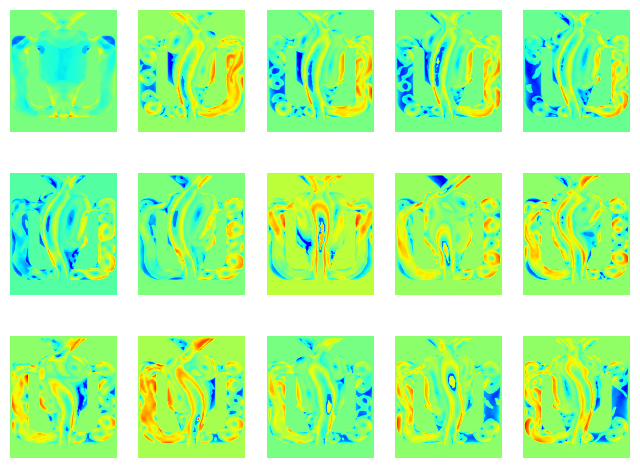

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(8, 6))
ax = ax.ravel()

for i in range(15):
    
    img = np.array(np.real(np.reshape(data[: , i*5],(Height,Width))))

    ax[i].imshow(img,cmap='jet')

    ax[i].axis('off')

plt.show()


In [5]:
def DMD(X, Xprime, r):
    """
    Parameters:
    -----------
    X : numpy array
        The input data array, where each column represents a measurement at a time step.
    Xprime : numpy array
        The shifted input data array, where each column represents a measurement at a time step shifted by one relative to X.
    r : int
        The number of dynamic modes to retain in the computation, must be less than or equal to the number of columns in X.

    Returns:
    --------
    Phi : numpy array
        The eigenvectors, where each column represents the spatial structure of a dynamic mode.
    Lambda : numpy array
        The eigenvalues, where each value represents the exponential decay rate of a dynamic mode.
    b : numpy array
        The coefficients that linearly combine the dynamic modes to form the original data.
    """
    # Perform SVD on the input data array X
    U, Sigma, VT = np.linalg.svd(X, full_matrices=0)
    
    # Retain only the top r columns of U, Sigma, and VT
    Ur = U[:, :r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r, :]
    
    # ploting the semilog to check the portion that we want to keep
    plt.semilogy(np.diag(Sigma))
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('Semilogy Plot')
    plt.show()
    
    # Compute the reduced order dynamic matrix
    Atilde = np.linalg.solve(Sigmar.T, (Ur.T @ Xprime @ VTr.T).T).T 
    
    # Compute the eigenvalues and eigenvectors of Atilde
    Lambda, W = np.linalg.eig(Atilde)
    Lambda = np.diag(Lambda)
    
    # Compute the dynamic mode components Phi
    Phi = Xprime @ np.linalg.solve(Sigmar.T, VTr).T @ W 
    
    # Compute the coefficients b
    alpha1 = Sigmar @ VTr[:, 0]
    b = np.linalg.solve(W @ Lambda, alpha1)
    
    return Phi, Lambda, b


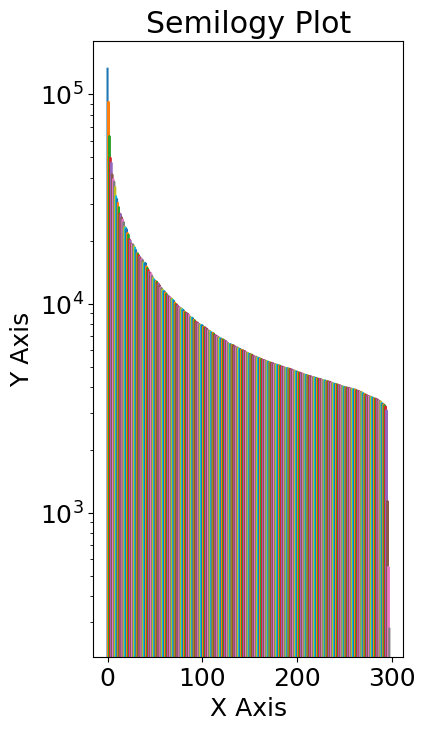

In [7]:
X = data.copy()
Phi, Lambda, b = DMD(X[:,:-1],X[:,1:],80)

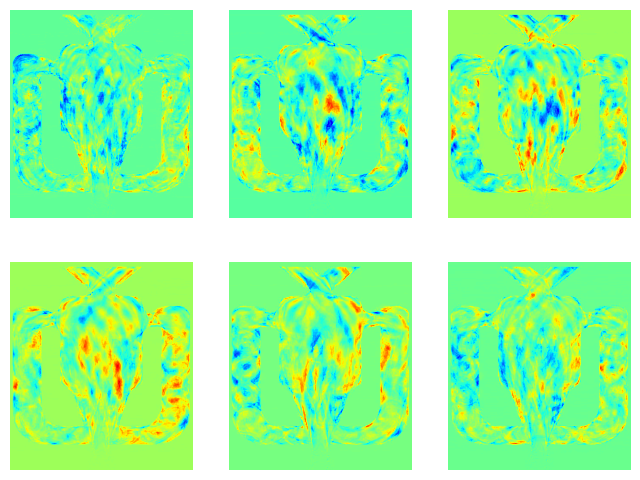

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
ax = ax.ravel()

for i in range(6):
    
    img = np.array(np.real(np.reshape(Phi[:,10+2*i],(Height,Width))))

    ax[i].imshow(img,cmap='jet')

    ax[i].axis('off')

plt.show()

